In [2]:
import requests
import pandas as pd

years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
results = []

for year in years:
    print(f"📅 Fetching data for {year}...")
    url = "https://api.ooni.io/api/v1/aggregation"
    params = {
        "axis_x": "probe_cc",
        "axis_y": "category_code",
        "test_name": "web_connectivity",
        "since": f"{year}-01-01",
        "until": f"{year}-12-31",
        "category_code": "HUMR"
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        for row in data["result"]:
            if row["confirmed_count"] > 0:
                results.append({"year": year, "country": row["probe_cc"], "confirmed_count": row["confirmed_count"]})
    else:
        print(f"❌ API error for {year}")

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()

📅 Fetching data for 2017...
📅 Fetching data for 2018...
📅 Fetching data for 2019...
📅 Fetching data for 2020...
📅 Fetching data for 2021...
📅 Fetching data for 2022...
📅 Fetching data for 2023...
📅 Fetching data for 2024...


,year,country,confirmed_count
0,2017,BE,1
1,2017,CN,324
2,2017,EG,10
3,2017,ID,193
4,2017,IR,1835


In [3]:
country_counts = df.groupby("year")["country"].nunique().reset_index()
country_counts.columns = ["year", "num_countries"]
print(country_counts)

   year  num_countries
0  2017              5
1  2018              6
2  2019             15
3  2020             13
4  2021              8
5  2022             10
6  2023             37
7  2024             34


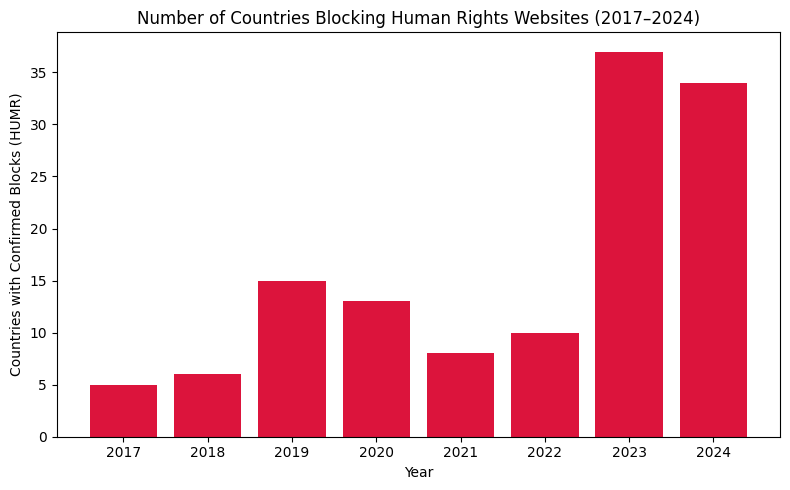

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(country_counts["year"].astype(str), country_counts["num_countries"], color="crimson")
plt.title("Number of Countries Blocking Human Rights Websites (2017–2024)")
plt.xlabel("Year")
plt.ylabel("Countries with Confirmed Blocks (HUMR)")
plt.tight_layout()
plt.show()